# Lead Score - Case Study

`An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.` 

`The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.`

`X Education needs help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.`

## Step 1: Importing Libraries

In [1]:
#Importing the necessary libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

#supressing warnings:

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = 300

## Step 2: Reading and understanding Data


In [2]:
#Reading the data:

df = pd.read_csv("Leads.csv")

In [3]:
#Checking the head of the data:

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Shape of the data:

df.shape

(9240, 37)

##### Number of rows = 9240 & Number of Columns = 37.

In [5]:
#Checking the info of the data:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#Describe the data:

round(df.describe(),3)

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000,9240.000,9103.000,9240.000,9103.000,5022.000,5022.000
mean,617188.436,0.385,3.445,487.698,2.363,14.306,16.345
std,23405.996,0.487,4.855,548.021,2.161,1.387,1.811
min,579533.000,0.000,0.000,0.000,0.000,7.000,11.000
25%,596484.500,0.000,1.000,12.000,1.000,14.000,15.000
50%,615479.000,0.000,3.000,248.000,2.000,14.000,16.000
75%,637387.250,1.000,5.000,936.000,3.000,15.000,18.000
max,660737.000,1.000,251.000,2272.000,55.000,18.000,20.000


In [7]:
#Checking the null values:

df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

##### Data contains high number of missing values so we need to handle it correctly.

## Step 2.1: Handling missing values

In [8]:
#Checking the percent of null values:

round((df.isnull().sum()/len(df))*100,2).sort_values(ascending = False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [9]:
#Dropping the columns with missing values greater than 40%:

df.drop(["Lead Quality",
        "Asymmetrique Activity Index",
        "Asymmetrique Profile Score" ,
        "Asymmetrique Activity Score",
        "Asymmetrique Profile Index" ], axis = 1 , inplace = True)

In [10]:
#Checking head of the data:

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [11]:
#Checking the missing values percentage again:

round((df.isnull().sum()/len(df))*100,2).sort_values(ascending = False)

Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Prospect ID                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free cop

### Checking Columns one by one:

#### 1) 'Tags' Column:

In [12]:
#Checking "Tags" Column:

df["Tags"].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [13]:
#Imputing the missing values with 'Not Specified' category:
#Because imputing with mode will cause biasing and dropping these rows will cause loss of important data

df["Tags"] = df["Tags"].fillna("Tags_Not_Specified")

In [14]:
#Checking the value percent in Tags column:

round(df["Tags"].value_counts()/len(df["Tags"])*100,2)

Tags_Not_Specified                                   36.29
Will revert after reading the email                  22.42
Ringing                                              13.02
Interested in other courses                           5.55
Already a student                                     5.03
Closed by Horizzon                                    3.87
switched off                                          2.60
Busy                                                  2.01
Lost to EINS                                          1.89
Not doing further education                           1.57
Interested  in full time MBA                          1.27
Graduation in progress                                1.20
invalid number                                        0.90
Diploma holder (Not Eligible)                         0.68
wrong number given                                    0.51
opp hangup                                            0.36
number not provided                                   0.

In [15]:
#Combining anything below 3% and replacing it with "Others":

df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP',
                                 'in touch with EINS','Diploma holder (Not Eligible)',
                                 'Approached upfront',
                                 'Graduation in progress',
                                 'number not provided', 
                                 'opp hangup',
                                 'Still Thinking',
                                 'Lost to Others',
                                 'Shall take in the next coming month',
                                 'Lateral student','Interested in Next batch',
                                 'Recognition issue (DEC approval)',
                                 'Want to take admission but has financial problems',
                                 'University not recognized',
                                 'switched off',
                                 'Already a student',
                                 'Not doing further education',
                                 'invalid number',
                                 'wrong number given',
                                 'Interested  in full time MBA',
                                 'Busy',
                                 'Lost to EINS'], 'Others')

In [16]:
#Checking the value percent in Tags column again:

round(df["Tags"].value_counts()/len(df["Tags"])*100,2)

Tags_Not_Specified                     36.29
Will revert after reading the email    22.42
Others                                 18.84
Ringing                                13.02
Interested in other courses             5.55
Closed by Horizzon                      3.87
Name: Tags, dtype: float64

#### 2) 'Lead Profile' Column:

In [17]:
#Checking "Lead Profile" Column:

df["Lead Profile"].value_counts(dropna=False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [18]:
#Replacing "Select" category with 'nan' as it is as good as missing value:

df["Lead Profile"] = df["Lead Profile"].replace("Select",np.nan)

#Checking value count percentage:

round(df["Lead Profile"].value_counts(dropna=False)/len(df["Lead Profile"])*100,2)

NaN                            74.19
Potential Lead                 17.46
Other Leads                     5.27
Student of SomeSchool           2.61
Lateral Student                 0.26
Dual Specialization Student     0.22
Name: Lead Profile, dtype: float64

##### This column has more than 40% missing values so it needs to dropped.

In [19]:
#Dropping the Lead Profile column:

df.drop("Lead Profile", axis = 1, inplace = True)

#### 3) 'What matters most to you in choosing a course' Column:

In [20]:
#Checking the value count of 'What matters most to you in choosing a course' column:

df["What matters most to you in choosing a course"].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [21]:
#Replacing the 'nan' values with 'Not Specified':

df['What matters most to you in choosing a course'] =df['What matters most to you in choosing a course'].fillna('Not_Specified')

#Checking the value count of 'What matters most to you in choosing a course' column again:

df["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Not_Specified                2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### 4) 'What is your current occupation' Column:


In [22]:
#Checking 'What is your current occupation' Column:

df['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [23]:
#Replacing the 'nan' values with mode:

df['What is your current occupation'] = df['What is your current occupation'
                                          ].fillna(df["What is your current occupation"].mode()[0])

#Checking 'What is your current occupation' Column:

df['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### 5) 'Country' Column:

In [24]:
#Checking the 'Country' Column:

df["Country"].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

##### As most of the records belongs to 'India' this variable is not significant and will not help much in classification, it is better to drop this column.

In [25]:
#Dropping the 'Country' column:

df.drop('Country', axis = 1, inplace = True)

#### 6) 'How did you hear about X Education' Column:

In [26]:
#Checking the value counts of 'How did you hear about X Education':

df['How did you hear about X Education'].value_counts(dropna=False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [27]:
#Replacing "Select" category with 'nan' as it is as good as missing value:

df['How did you hear about X Education'] = df['How did you hear about X Education'].replace('Select',np.nan)

#Checking the value counts percent:

df['How did you hear about X Education'].value_counts(dropna=False)/len(df['How did you hear about X Education'])*100

NaN                      78.463203
Online Search             8.744589
Word Of Mouth             3.766234
Student of SomeSchool     3.354978
Other                     2.012987
Multiple Sources          1.645022
Advertisements            0.757576
Social Media              0.725108
Email                     0.281385
SMS                       0.248918
Name: How did you hear about X Education, dtype: float64

##### This column has more than 40% missing values so it needs to dropped.

In [28]:
#Dropping the 'How did you hear about X Education' Column:

df.drop('How did you hear about X Education', axis = 1, inplace = True)

#### 7) 'Specialization' Column:

In [29]:
#Checking the 'Specialization' Column:

df['Specialization'].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [30]:
#Replacing "Select" category with 'nan' as it is as good as missing value:

df['Specialization'] = df['Specialization'].replace('Select',np.nan)

#Checking the value counts percent:

df['Specialization'].value_counts(dropna=False)/len(df['Specialization'])*100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [31]:
#Replacing the 'nan' values with 'Not Specified':

df['Specialization'] = df['Specialization'].fillna('Specialization_Not_Specified')

In [32]:
#Combining all the management specialization under one single category:

df['Specialization'] = df['Specialization'].replace(['Finance Management',
                                                     'Human Resource Management',
                                                     'Marketing Management',
                                                     'Operations Management',
                                                     'IT Projects Management',
                                                     'Supply Chain Management',
                                                     'Healthcare Management',
                                                     'Hospitality Management',
                                                     'Retail Management'], 'Management_Specialization')

#Checking the value count again:

df['Specialization'].value_counts()

Management_Specialization            4253
Specialization_Not_Specified         3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### 8) 'City' Column: 

In [33]:
#Checking the'City' Column:

df['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [34]:
#Replacing the 'Select' and 'nan' values with 'Other Cities':

df['City'] = df['City'].fillna('Other Cities')
df['City'] = df['City'].replace('Select','Other Cities')

#Checking the value count again:

df['City'].value_counts()

Other Cities                   4355
Mumbai                         3222
Thane & Outskirts               752
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

#### 9) 'TotalVisits' Column:


In [35]:
#Checking the 'TotalVisits' column:

df['TotalVisits'].value_counts(dropna=False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [36]:
#Imputing the missing values with mode of the colunm:

df['TotalVisits'] = df['TotalVisits'].fillna(df['TotalVisits'].mode()[0])

#### 10) 'Page Views Per Visit' Column:



In [37]:
#Checking the 'Page Views Per Visit' column:

df['Page Views Per Visit'].value_counts(dropna=False)

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.56       1
6.33       1
1.64       1
8.21       1
2.08       1
Name: Page Views Per Visit, Length: 115, dtype: int64

In [38]:
#Imputing the missing values with mode of the column:

df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].mode()[0])

#### 11) 'Last Activity' Column:

In [39]:
#Checking the'Last Activity' Column:

df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [40]:
#Imputing the missing values with mode of the column:

df['Last Activity'] = df['Last Activity'].fillna(df['Last Activity'].mode()[0])

In [41]:
#Checking the value count percentage:

round(df['Last Activity'].value_counts(normalize=True)*100,2)

Email Opened                    38.31
SMS Sent                        29.71
Olark Chat Conversation         10.53
Page Visited on Website          6.93
Converted to Lead                4.63
Email Bounced                    3.53
Email Link Clicked               2.89
Form Submitted on Website        1.26
Unreachable                      1.01
Unsubscribed                     0.66
Had a Phone Conversation         0.32
Approached upfront               0.10
View in browser link Clicked     0.06
Email Received                   0.02
Email Marked Spam                0.02
Visited Booth in Tradeshow       0.01
Resubscribed to emails           0.01
Name: Last Activity, dtype: float64

In [42]:
#Combining anything under 1% under same category others:

df['Last Activity'] = df['Last Activity'].replace(['Unreachable',
                                                  'Unsubscribed',
                                                  'Had a Phone Conversation',
                                                  'Approached upfront',
                                                  'View in browser link Clicked',
                                                  'Email Received',
                                                  'Email Marked Spam',
                                                  'Visited Booth in Tradeshow',
                                                  'Resubscribed to emails'],'Others')

#Checking the value count percentage again:

round(df['Last Activity'].value_counts(normalize=True)*100,2)

Email Opened                 38.31
SMS Sent                     29.71
Olark Chat Conversation      10.53
Page Visited on Website       6.93
Converted to Lead             4.63
Email Bounced                 3.53
Email Link Clicked            2.89
Others                        2.22
Form Submitted on Website     1.26
Name: Last Activity, dtype: float64

#### 12) 'Lead Source' Column:

In [43]:
#Checking the 'Lead Source' Column:

df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [44]:
#Imputing the missing values with mode of the column:

df['Lead Source'] = df['Lead Source'].fillna(df['Lead Source'].mode()[0])

#Merging the 'google' and 'Google' under 'Google':

df['Lead Source'] = df['Lead Source'].replace('google','Google')

#Checking the value count percentage:

round(df['Lead Source'].value_counts(normalize = True)*100,2)

Google               31.48
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
bing                  0.06
Click2call            0.04
Social Media          0.02
Live Chat             0.02
Press_Release         0.02
Pay per Click Ads     0.01
blog                  0.01
WeLearn               0.01
welearnblog_Home      0.01
youtubechannel        0.01
testone               0.01
NC_EDM                0.01
Name: Lead Source, dtype: float64

In [45]:
#Combining anything under 1% into same category:

df['Lead Source'] = df['Lead Source'].replace(['bing',
                                               'Facebook',
                                               'Click2call',
                                               'Press_Release',
                                               'youtubechannel',
                                               'welearnblog_Home',
                                               'WeLearn',
                                               'blog',
                                               'Live Chat',
                                               'Social Media',
                                               'Pay per Click Ads',
                                               'testone',
                                               'NC_EDM'] ,'Others')

#Checking the value count percentage again:

round(df['Lead Source'].value_counts(normalize = True)*100,2)

Google              31.48
Direct Traffic      27.52
Olark Chat          18.99
Organic Search      12.49
Reference            5.78
Welingak Website     1.54
Referral Sites       1.35
Others               0.84
Name: Lead Source, dtype: float64

In [46]:
#Final Check for the missing Values:

df.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

##### All the missing values are handled.

In [47]:
#Checking the head of the data:

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Specialization_Not_Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Other Cities,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Specialization_Not_Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Other Cities,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Specialization_Not_Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


### Checking the remaining columns:

In [48]:
#Checking the value counts:

df['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [49]:
#Checking the value counts:

df['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [50]:
#Checking the value counts:

df['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [51]:
#Checking the value counts:

df['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [52]:
#Checking the value counts:

df['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [53]:
#Checking the value counts:

df['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [54]:
#Checking the value counts:

df['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [55]:
#Checking the value counts:

df['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [56]:
#Checking the value counts:

df['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [57]:
#Checking the value counts:

df['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [58]:
#Checking the value counts:

df['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [59]:
#Checking the value counts:

df['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [60]:
#Checking the summary:

df['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [61]:
#Checking the value counts:

df['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [62]:
#Checking the value counts:

df['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [63]:
#Checking the value counts:

df['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [64]:
#Checking the value counts:

df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [65]:
#Checking the value count percentage:

round(df['Last Notable Activity'].value_counts(normalize=True)*100,2)

Modified                        36.87
Email Opened                    30.60
SMS Sent                        23.51
Page Visited on Website          3.44
Olark Chat Conversation          1.98
Email Link Clicked               1.87
Email Bounced                    0.65
Unsubscribed                     0.51
Unreachable                      0.35
Had a Phone Conversation         0.15
Email Marked Spam                0.02
Approached upfront               0.01
Resubscribed to emails           0.01
View in browser link Clicked     0.01
Form Submitted on Website        0.01
Email Received                   0.01
Name: Last Notable Activity, dtype: float64

In [66]:
#Combining anything under 1% into single category:

df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                   'Email Marked Spam',
                                                                   'Unreachable',
                                                                   'Unsubscribed',
                                                                   'Email Bounced',                                                                    
                                                                   'Resubscribed to emails',
                                                                   'View in browser link Clicked',
                                                                   'Approached upfront', 
                                                                   'Form Submitted on Website', 
                                                                   'Email Received'],'Other_Notable_activity')

#Checking value count percentage of 'Last Notable Activity' again:

round(df['Last Notable Activity'].value_counts(normalize=True)*100,2)

Modified                   36.87
Email Opened               30.60
SMS Sent                   23.51
Page Visited on Website     3.44
Olark Chat Conversation     1.98
Email Link Clicked          1.87
Other_Notable_activity      1.73
Name: Last Notable Activity, dtype: float64

##### After observing the remaining colums we found the biasing in certain columns(i.e, one class is relatively higher than other).
##### We need to drop these columns because they lack variation.

In [67]:
#Dropping those columns with high biasing:

df.drop(['Do Not Call',
         'Search',
         'Magazine',
         'Newspaper Article',
         'X Education Forums',
         'Newspaper',
         'Digital Advertisement',
         'Through Recommendations',
         'Receive More Updates About Our Courses',
         'Update me on Supply Chain Content',
         'Get updates on DM Content',
         'I agree to pay the amount through cheque',
         'What matters most to you in choosing a course'],axis = 1 , inplace = True)

#Checking the head of the data:

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Specialization_Not_Specified,Unemployed,Interested in other courses,Other Cities,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Specialization_Not_Specified,Unemployed,Ringing,Other Cities,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Specialization_Not_Specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [68]:
#Checking the shape of the data:

df.shape

(9240, 16)

In [69]:
#Checking the info of the data:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9240 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9240 non-null   float64
 9   Last Activity                           9240 non-null   object 
 10  Specialization                          9240 non-null   obje

## Step 2.2: Outlier Checking

<function matplotlib.pyplot.show(close=None, block=None)>

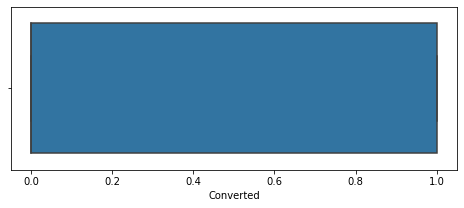

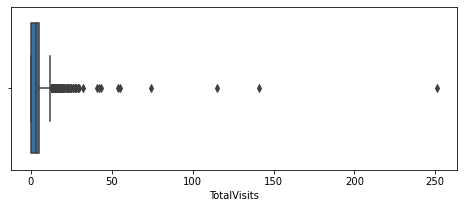

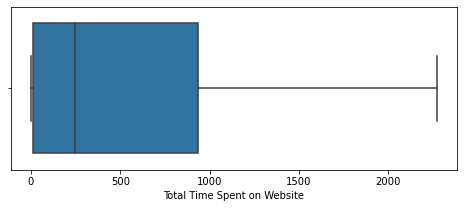

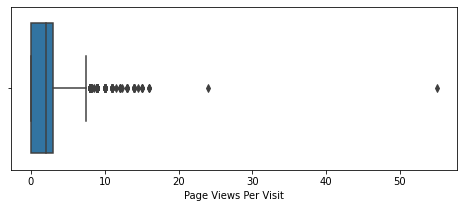

In [70]:
#Plotting box plot for all the continous columns:

plt.figure(figsize = (8,3))
sns.boxplot(df['Converted'])
plt.show

plt.figure(figsize = (8,3))
sns.boxplot(df['TotalVisits'])
plt.show

plt.figure(figsize = (8,3))
sns.boxplot(df['Total Time Spent on Website'])
plt.show

plt.figure(figsize = (8,3))
sns.boxplot(df['Page Views Per Visit'])
plt.show

##### 'TotalVisits' and 'Page Views Per Visit' columns have outliers.

In [71]:
#Checking the summary of the numerical columns with quantiles:

df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.394156,487.698268,2.327787
std,23405.995698,0.486714,4.836682,548.021466,2.164258
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,0.000000,12.000000,0.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


##### Clearly we can see that value rises sharply after 99%tile. So we need to handle this.

In [72]:
#Removing the values greater than 99%tile:

df = df[df["TotalVisits"] < df['TotalVisits'].quantile(0.99)]

#Checking the summary again:

df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9141.00000,9141.000000,9141.000000,9141.000000,9141.000000
mean,617233.45192,0.385406,3.134777,486.074609,2.299531
std,23413.72193,0.486718,2.939096,547.856302,2.065837
min,579533.00000,0.000000,0.000000,0.000000,0.000000
25%,596519.00000,0.000000,0.000000,10.000000,0.000000
50%,615563.00000,0.000000,3.000000,247.000000,2.000000
75%,637414.00000,1.000000,5.000000,933.000000,3.000000
90%,650514.00000,1.000000,7.000000,1379.000000,5.000000
95%,655406.00000,1.000000,9.000000,1561.000000,6.000000
99%,659592.80000,1.000000,13.000000,1839.600000,9.000000


In [73]:
#Removing the values greater than 99%tile:

df = df[df["Page Views Per Visit"] < df['Page Views Per Visit'].quantile(0.99)]

#Checking the summary again:

df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000
mean,617223.248422,0.385092,3.041644,483.133016,2.196036
std,23372.383121,0.486644,2.826553,547.420675,1.843445
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596530.000000,0.000000,0.000000,7.000000,0.000000
50%,615645.000000,0.000000,3.000000,245.000000,2.000000
75%,637360.000000,1.000000,4.000000,929.000000,3.000000
90%,650463.200000,1.000000,7.000000,1378.000000,5.000000
95%,655351.600000,1.000000,8.000000,1558.000000,6.000000
99%,659577.800000,1.000000,13.000000,1839.720000,7.000000


In [74]:
#Checking the shape of the data after missing value and outlier handling:

df.shape

(9029, 16)

## Step 3: Visualising the Data

In [75]:
#Checking the info of the data:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9029 non-null   object 
 1   Lead Number                             9029 non-null   int64  
 2   Lead Origin                             9029 non-null   object 
 3   Lead Source                             9029 non-null   object 
 4   Do Not Email                            9029 non-null   object 
 5   Converted                               9029 non-null   int64  
 6   TotalVisits                             9029 non-null   float64
 7   Total Time Spent on Website             9029 non-null   int64  
 8   Page Views Per Visit                    9029 non-null   float64
 9   Last Activity                           9029 non-null   object 
 10  Specialization                          9029 non-null   obje

In [76]:
#defining function for plotting countplot for categorical columns:

def bi_var(col):
    plt.figure(figsize = (10,5))
    sns.countplot(df[col], hue = df['Converted'])
    plt.title(col + " VS Converted")
    plt.xticks(rotation = 90)
    plt.show()

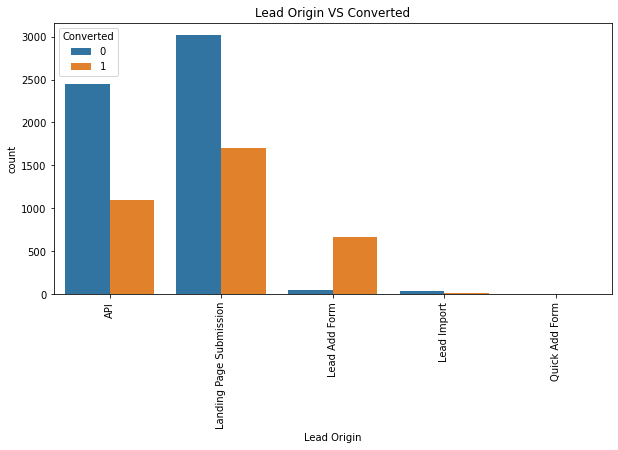

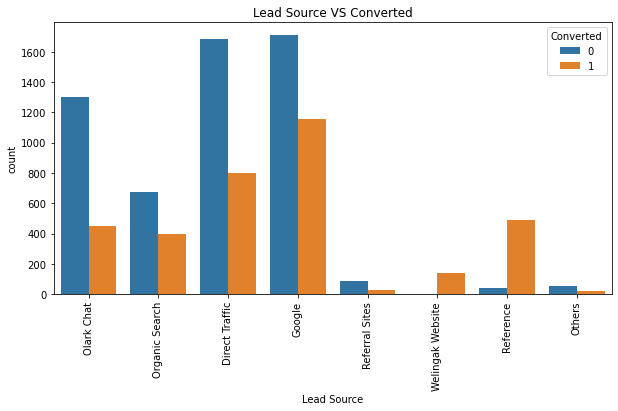

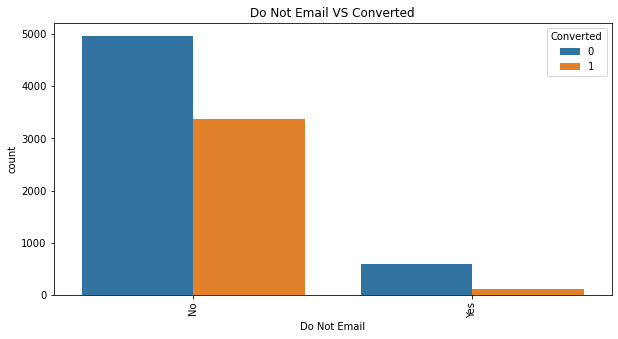

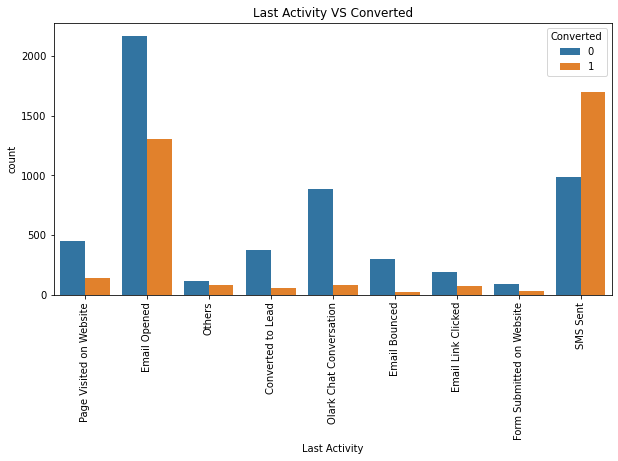

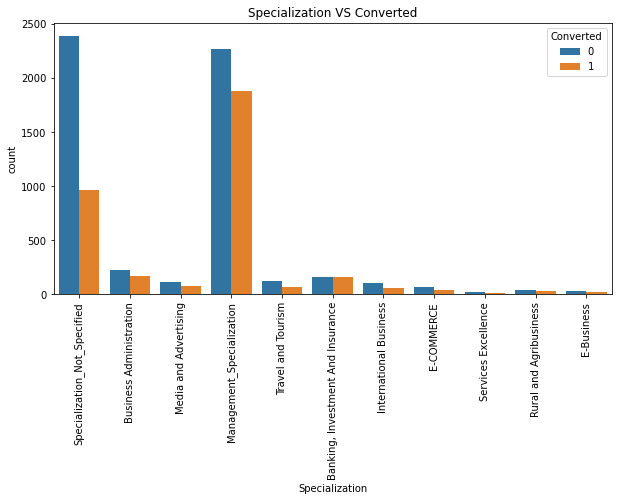

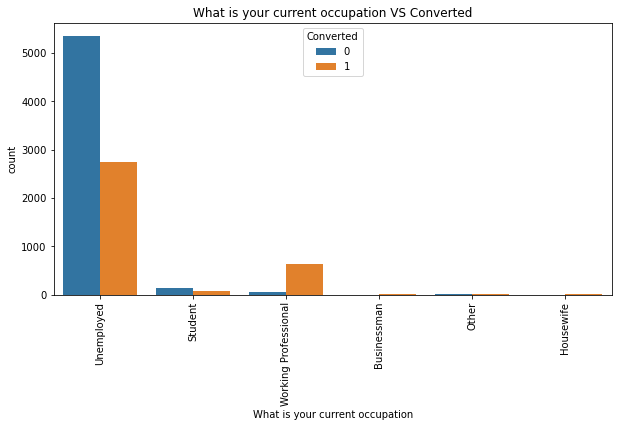

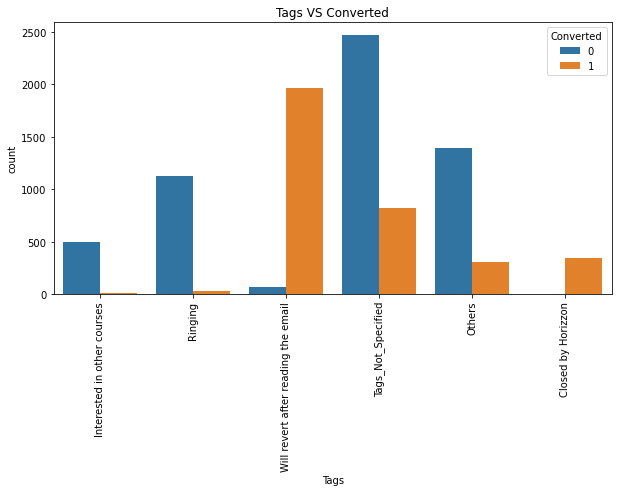

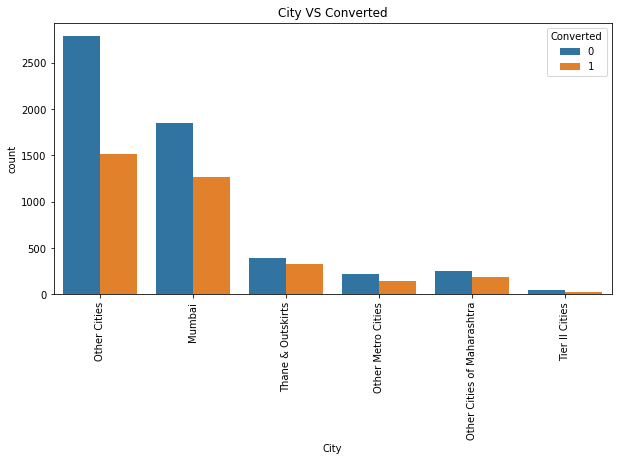

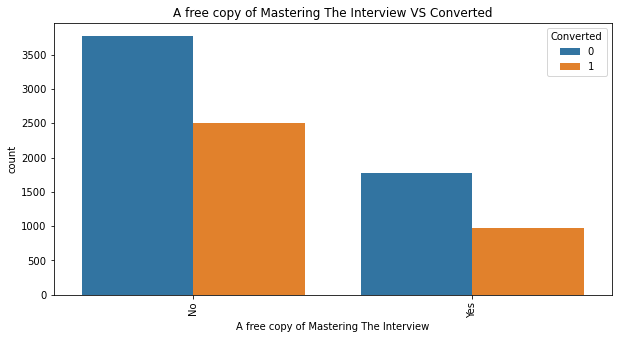

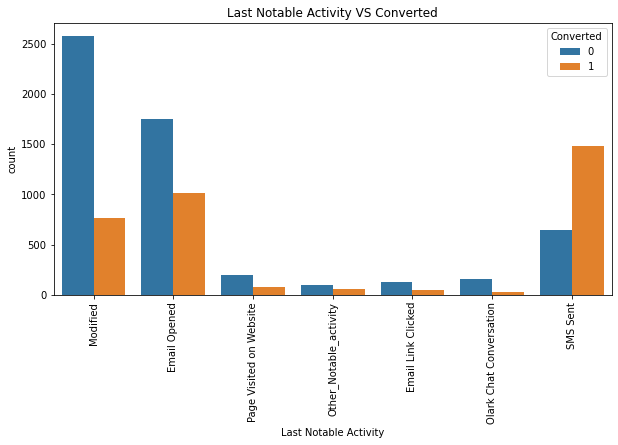

In [77]:
#Plotting countplot for categorical Columns:

cat_cols = ['Lead Origin', 
            'Lead Source', 
            'Do Not Email', 
            'Last Activity',
            'Specialization', 
            'What is your current occupation', 
            'Tags', 
            'City', 
            'A free copy of Mastering The Interview', 
            'Last Notable Activity']

for col in cat_cols:
    bi_var(col)

##### Observation:
- Comparative to other lead origins categories 'Lead Add Form' category has the highest conversion ratio.
- 'Reference' category in 'Lead Source' column is doing good followed by 'Google' & 'Direct Traffic' in conversions.
- Chance of conversion increases when the customer do not decline for Email.
- 'SMS Sent' category in 'Last Activity' column has highest conversion ratio followed by 'Email Opened'.
- 'Working Professional' seems to convert more as compared to 'Unemployed' Ones.

<Figure size 720x720 with 0 Axes>

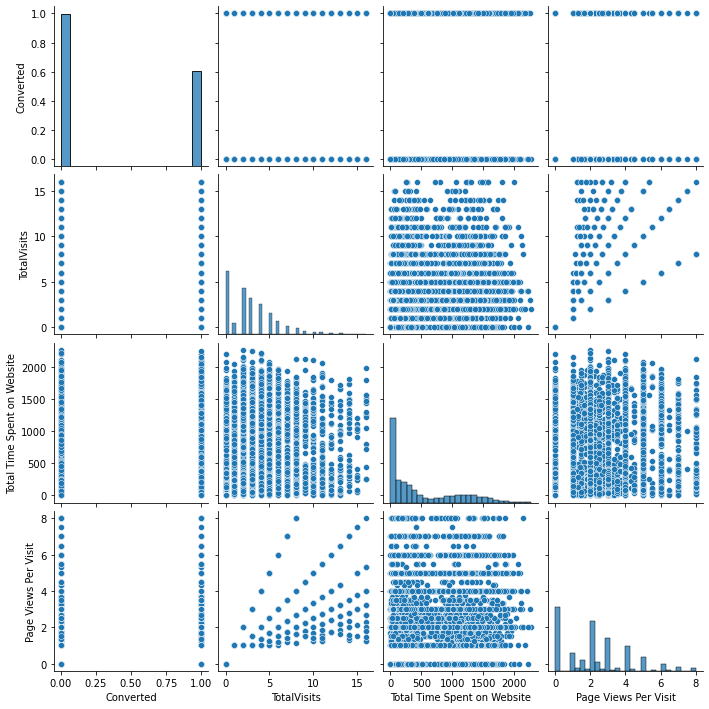

In [78]:
#Plotting the Pairplot for numrical columns:

num_cols =['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']

plt.figure(figsize=(10,10))
sns.pairplot(data = df, vars=num_cols)
plt.show()

##### Observation:
- 'Page Views Per Visit' and 'TotalVisits' columns seems to show some linear pattern.

In [79]:
#Checking the correlation matrix:

df.corr()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.000000,0.025647,0.045606,0.021908,0.057962
Converted,0.025647,1.000000,0.038347,0.359630,-0.017241
TotalVisits,0.045606,0.038347,1.000000,0.337892,0.729247
Total Time Spent on Website,0.021908,0.359630,0.337892,1.000000,0.334180
Page Views Per Visit,0.057962,-0.017241,0.729247,0.334180,1.000000


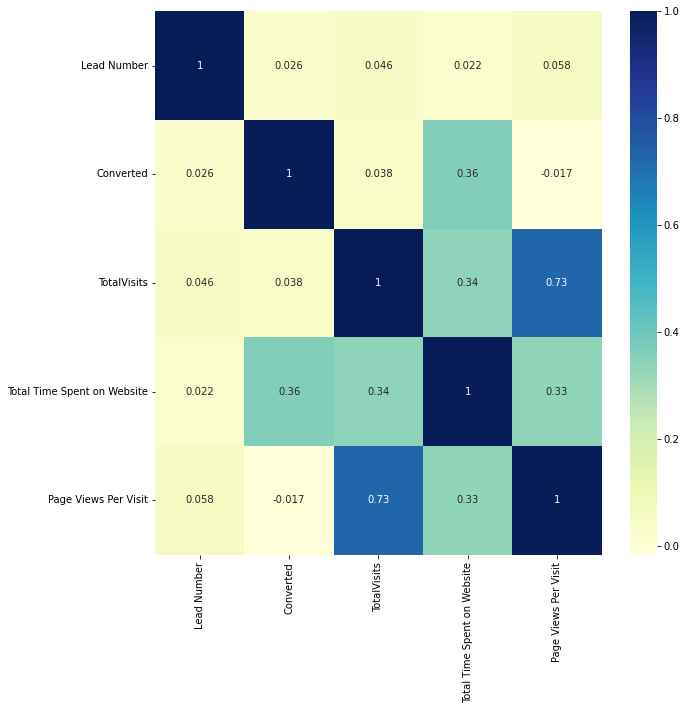

In [80]:
#Plotting the HeatMap:

plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot=True)
plt.show()

##### Observation:
- 'TotalVisits' and 'Page Views Per Visit' column have highest correlation.

#### Checking for Data Imbalance in Target Variable:

In [81]:
#Checking the value count percentage:

round(df['Converted'].value_counts(normalize=True)*100,2)

0    61.49
1    38.51
Name: Converted, dtype: float64

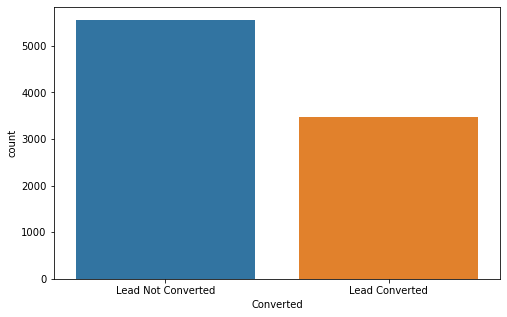

In [82]:
#Plotting a Count Plot:

plt.figure(figsize=(8,5))
sns.countplot(df['Converted'])
plt.xticks([0,1],['Lead Not Converted','Lead Converted'])
plt.show()

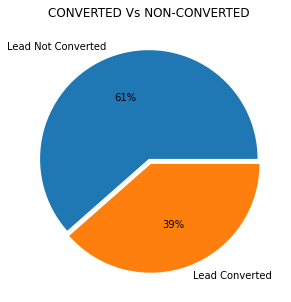

In [83]:
#Plotting a pie plot for comparison:

target_df = df['Converted'].value_counts(normalize=True)*100     #storing the plot data
label = ['Lead Not Converted','Lead Converted']                  #labels stored in a list

plt.figure(figsize=(8,5))
plt.pie(target_df, labels=label, explode=(0,0.05), autopct='%1.f%%')
plt.title('CONVERTED Vs NON-CONVERTED')
plt.show()

##### Observation: There doesn't seem to be data imblance in the 'Target Variable'.

## Step 4: Data Preprocessing

In [84]:
#Checking the head of the data:

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Specialization_Not_Specified,Unemployed,Interested in other courses,Other Cities,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Specialization_Not_Specified,Unemployed,Ringing,Other Cities,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Specialization_Not_Specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [85]:
#Some columns need to be converted in binary:

df['Do Not Email'] = df['Do Not Email'].map({'No':0,'Yes':1})
df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].map({'No':0,'Yes':1})

#Checking these columns:
df[['Do Not Email','A free copy of Mastering The Interview']].head()


,Do Not Email,A free copy of Mastering The Interview
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0


In [86]:
# creating dummy variables for categorical columns with multi levels:

lead_origin           = pd.get_dummies(df['Lead Origin']   ,drop_first=True, prefix='Lead Origin' )
lead_source           = pd.get_dummies(df['Lead Source']   ,drop_first=True, prefix='Lead Source')
last_activity         = pd.get_dummies(df['Last Activity'] ,drop_first=True, prefix='Last Activity')
specialization        = pd.get_dummies(df['Specialization'],drop_first=True, prefix='Specialization')
current_occup         = pd.get_dummies(df['What is your current occupation'],drop_first=True, prefix='current_occup')
tags                  = pd.get_dummies(df['Tags']          ,drop_first=True, prefix='Tags')
city                  = pd.get_dummies(df['City']          ,drop_first=True, prefix='City')
last_notable_activity = pd.get_dummies(df['Last Notable Activity'],drop_first=True, prefix='Last Notable Activity')

#concating the original dataframe with the dummy variable dataframe:

df_new = pd.concat([df, lead_origin, lead_source, last_activity, specialization, 
                    current_occup, tags, city, last_notable_activity], axis=1)

#dropping original columns as it is not needed in model building process:

df_new.drop(['Lead Origin', 
             'Lead Source', 
             'Last Activity', 
             'Specialization', 
             'What is your current occupation', 
             'Tags', 
             'City', 
             'Last Notable Activity'], axis = 1, inplace = True)

#Checking head of the new dataframe:

df_new.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Specialization_Not_Specified,Specialization_Travel and Tourism,current_occup_Housewife,current_occup_Other,current_occup_Student,current_occup_Unemployed,current_occup_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Tags_Not_Specified,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [87]:
#Checking the shape of the new dataframe:

df_new.shape

(9029, 58)

In [88]:
#Checking info:

df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 58 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9029 non-null   object 
 1   Lead Number                                    9029 non-null   int64  
 2   Do Not Email                                   9029 non-null   int64  
 3   Converted                                      9029 non-null   int64  
 4   TotalVisits                                    9029 non-null   float64
 5   Total Time Spent on Website                    9029 non-null   int64  
 6   Page Views Per Visit                           9029 non-null   float64
 7   A free copy of Mastering The Interview         9029 non-null   int64  
 8   Lead Origin_Landing Page Submission            9029 non-null   uint8  
 9   Lead Origin_Lead Add Form                      9029 

## Step 5: Splitting the dataset into Test & Train Dataset 

In [89]:
#splitting the dataset using sklearn library:

np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, test_size = 0.3, random_state = 42)

#cheching head and shape of train dataset:

print("Shape of the train data:",df_train.shape)
df_train.head()

Shape of the train data: (6320, 58)


,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Specialization_Not_Specified,Specialization_Travel and Tourism,current_occup_Housewife,current_occup_Other,current_occup_Student,current_occup_Unemployed,current_occup_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Tags_Not_Specified,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
2240,3908d248-cafa-4bf4-9f8d-454addbae372,637978,0,0,3.0,1993,3.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
113,25b8e642-c1f1-4e49-8557-71d2c78adada,659366,0,0,5.0,1566,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4132,1676ef9a-b158-4384-a597-99b939297f06,620372,0,1,6.0,1703,6.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5573,1f008145-2f76-4526-830e-c96379032a9a,607198,0,0,2.0,64,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1109,a5aaa6de-4b64-4c18-85f8-41fe135da139,648146,0,0,1.0,20,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0


In [90]:
#cheching head and shape of test dataset:

print("Shape of the train data:",df_test.shape)
df_test.head()

Shape of the train data: (2709, 58)


,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Specialization_Not_Specified,Specialization_Travel and Tourism,current_occup_Housewife,current_occup_Other,current_occup_Student,current_occup_Unemployed,current_occup_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Tags_Not_Specified,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
2296,079882c4-cdcb-4dbd-abfd-cd2ef7b118dd,637500,0,1,3.0,1475,3.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
8697,f4c39bd8-50a5-464d-a518-b152a095fbfa,583473,0,0,7.0,408,1.75,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
7378,162403e7-3cfb-4e4f-8e33-480afc41ffb6,592851,0,0,2.0,362,2.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
8631,d1b1a897-16d8-4092-a72f-46c3ed1c0066,583845,0,0,5.0,903,5.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
4799,565b4e96-015a-4f03-881f-8c32af5677dd,613965,0,1,8.0,1651,8.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1


In [91]:
#Dropping the ID cols from training dataset:

df_train.drop(['Prospect ID','Lead Number'], axis = 1, inplace = True)

In [92]:
#rescaling the features using StandardScaler to normalize the data:

scaler = StandardScaler()

#Standardizing all the countinuous variables:

num_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

#checking head of the data:

df_train.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Specialization_Not_Specified,Specialization_Travel and Tourism,current_occup_Housewife,current_occup_Other,current_occup_Student,current_occup_Unemployed,current_occup_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Tags_Not_Specified,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
2240,0,0,-0.000842,2.771964,0.455635,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
113,0,0,0.708873,1.989815,1.550527,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4132,0,1,1.063731,2.240762,2.097974,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5573,0,0,-0.355700,-0.761443,-0.091812,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1109,0,0,-0.710558,-0.842039,-0.639258,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0


In [93]:
#describing the data:

round(df_train.describe(),2)

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Specialization_Not_Specified,Specialization_Travel and Tourism,current_occup_Housewife,current_occup_Other,current_occup_Student,current_occup_Unemployed,current_occup_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Tags_Not_Specified,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
count,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.0,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.0,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00,6320.00
mean,0.08,0.39,-0.00,0.00,-0.00,0.30,0.52,0.08,0.01,0.00,0.31,0.2,0.12,0.01,0.06,0.01,0.02,0.04,0.03,0.38,0.01,0.11,0.02,0.07,0.30,0.04,0.01,0.01,0.02,0.46,0.02,0.01,0.00,0.38,0.02,0.00,0.00,0.02,0.9,0.07,0.05,0.18,0.13,0.36,0.22,0.48,0.05,0.04,0.08,0.01,0.30,0.37,0.02,0.02,0.03,0.24
std,0.27,0.49,1.00,1.00,1.00,0.46,0.50,0.28,0.08,0.01,0.46,0.4,0.32,0.09,0.24,0.11,0.13,0.19,0.17,0.49,0.11,0.31,0.14,0.25,0.46,0.20,0.08,0.10,0.14,0.50,0.15,0.08,0.06,0.49,0.15,0.04,0.04,0.15,0.3,0.26,0.23,0.39,0.34,0.48,0.42,0.50,0.22,0.19,0.27,0.09,0.46,0.48,0.14,0.13,0.18,0.43
min,0.00,0.00,-1.07,-0.88,-1.19,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,-1.07,-0.88,-1.19,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,-0.00,-0.44,-0.09,0.00,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,1.00,0.35,0.81,0.46,1.00,1.00,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00
max,1.00,1.00,4.61,3.18,3.19,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.

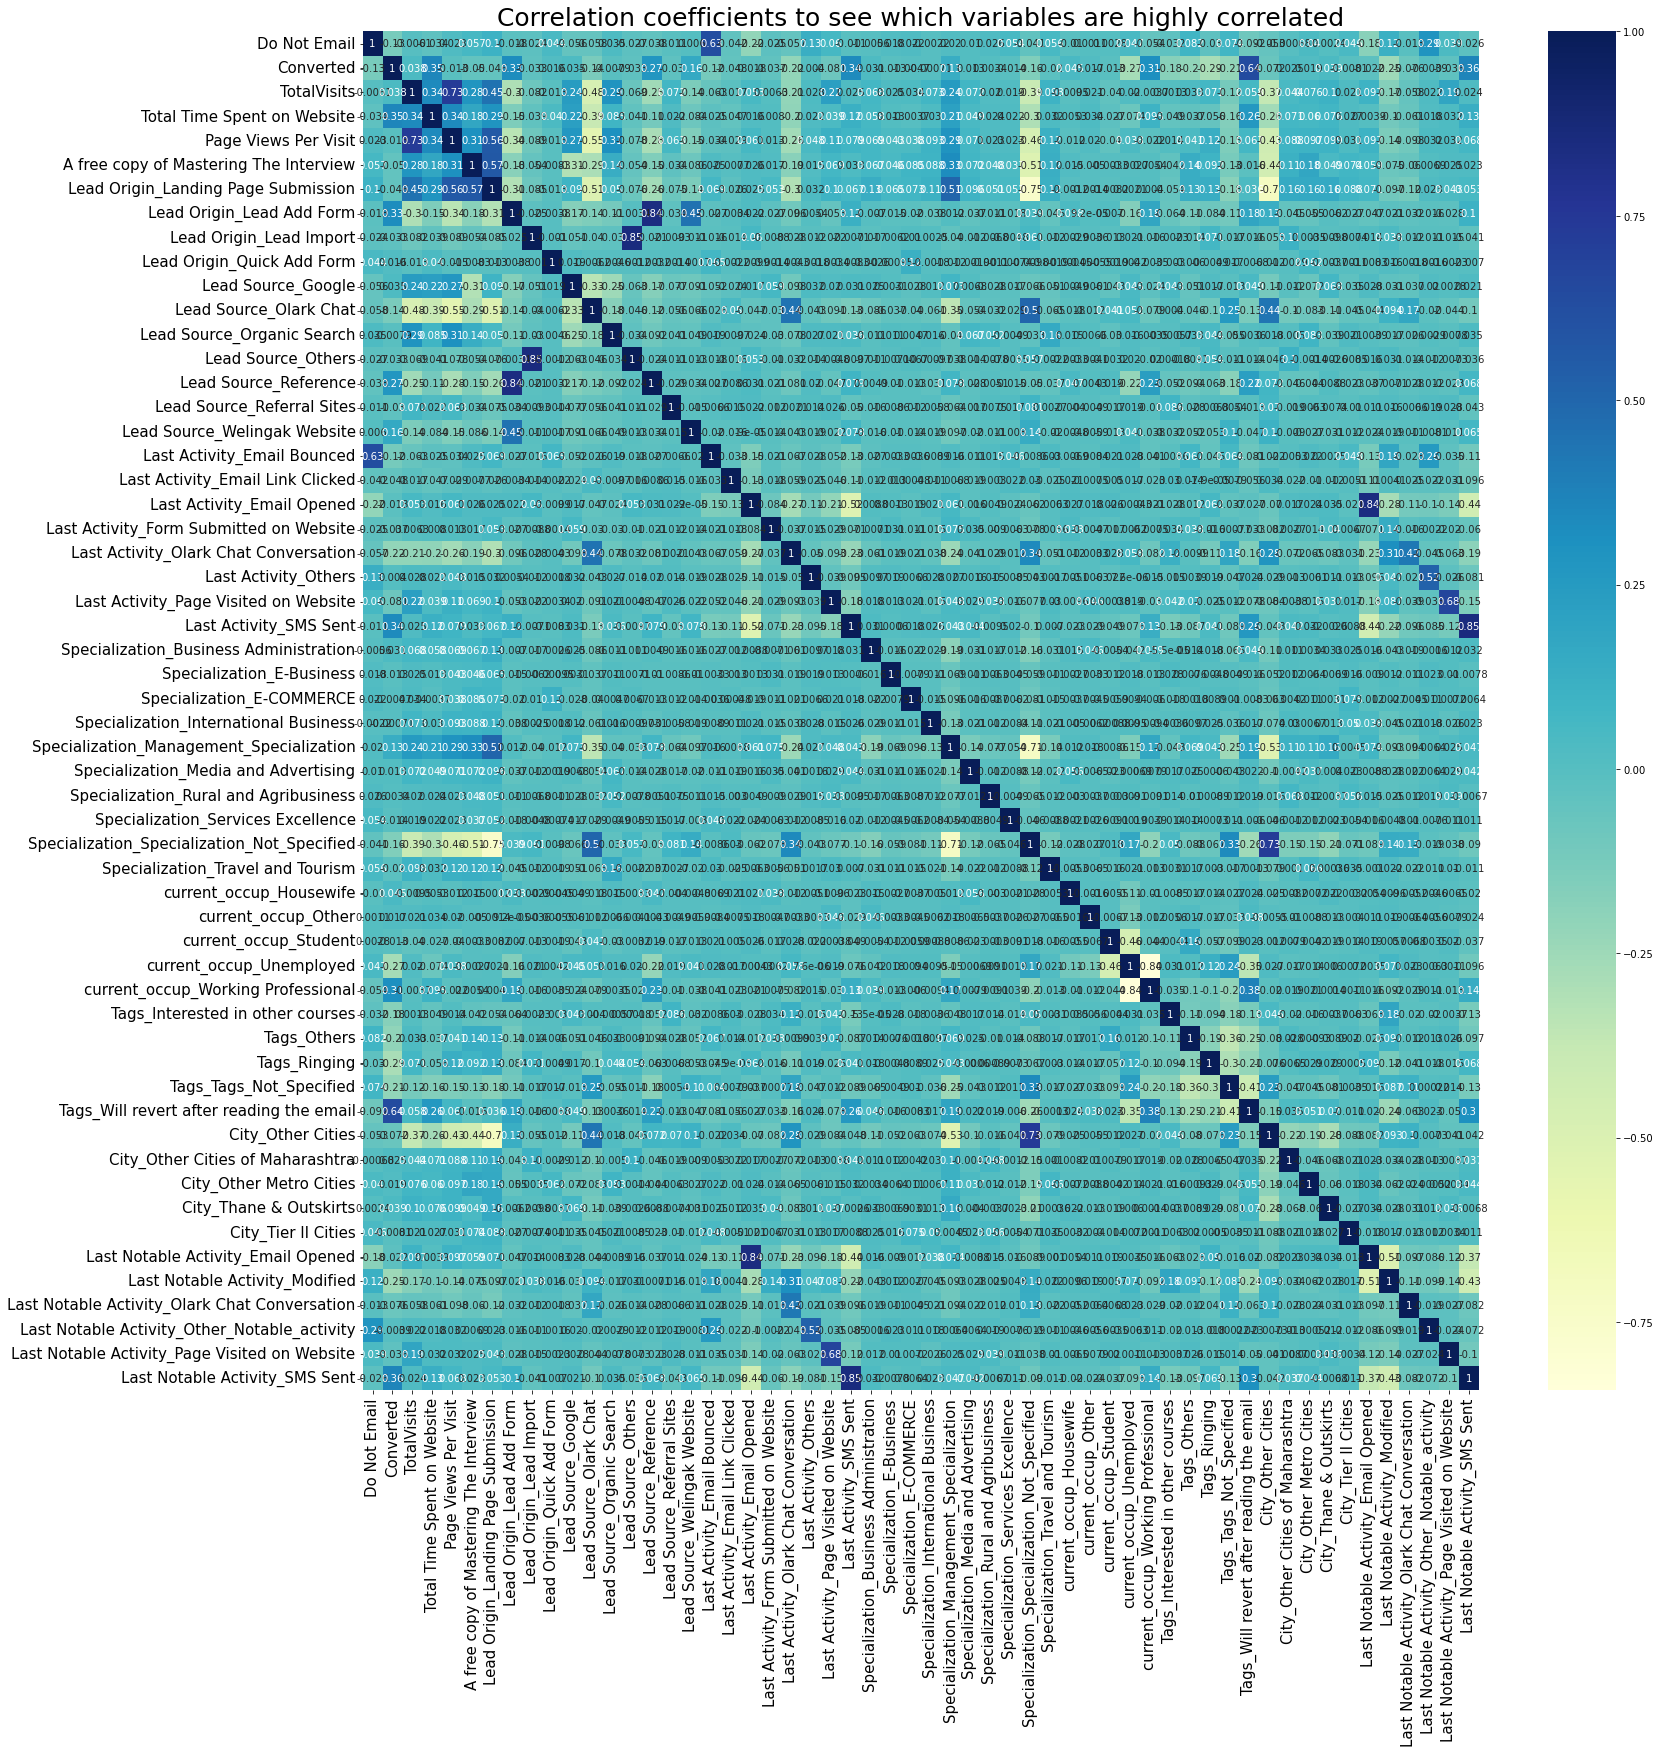

In [94]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.title("Correlation coefficients to see which variables are highly correlated",fontsize=25)
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

## Step 6: Building a Logistic regression model 

In [95]:
#splitting the df_train in X,y sets:

y_train = df_train.pop('Converted')
X_train = df_train

In [96]:
#using the RFE(recursive feature elimination) for initial feature selection:

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

rfe = RFE(logreg, n_features_to_select= 20)
rfe = rfe.fit(X_train, y_train)

#Checking the list of all 20 features:

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('A free copy of Mastering The Interview', False, 32),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 18),
 ('Lead Origin_Quick Add Form', True, 1),
 ('Lead Source_Google', False, 16),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 20),
 ('Lead Source_Others', False, 10),
 ('Lead Source_Reference', False, 17),
 ('Lead Source_Referral Sites', False, 22),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 6),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 5),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', False, 36),
 ('Last Activity_Page Visited on Website', False, 28),
 ('Last Activit

In [97]:
#Checking the feature names that got selected:

features = X_train.columns[rfe.support_]
print(features)

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Quick Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Specialization_Travel and Tourism',
       'current_occup_Working Professional',
       'Tags_Interested in other courses', 'Tags_Others', 'Tags_Ringing',
       'Tags_Tags_Not_Specified', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Other_Notable_activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')


In [98]:
#Creating a function to calculate VIF(Variance Inflation Factor):

def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [99]:
#Defining a function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter:

def build_model(cols):
    build_model.X_train_sm = sm.add_constant(X_train[cols])
    logm1 = sm.GLM(y_train,build_model.X_train_sm, family = sm.families.Binomial())
    build_model.res = logm1.fit() 
    print(build_model.res.summary())
    return build_model.res

### Building 1st model:

In [100]:
build_model(features)
get_vif(features)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1464.5
Date:                Mon, 23 Jan 2023   Deviance:                       2928.9
Time:                        02:34:37   Pearson chi2:                 7.97e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.5826
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

##### We need to drop 'Lead Origin_Quick Add Form' as it is Insignificant(High p-value).

In [101]:
#Dropping 'Lead Origin_Quick Add Form' column:

features = features.drop('Lead Origin_Quick Add Form')

#Checking head of the data:

X_train[features].head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Travel and Tourism,current_occup_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Tags_Not_Specified,Tags_Will revert after reading the email,Last Notable Activity_Other_Notable_activity,Last Notable Activity_SMS Sent
2240,0,2.771964,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
113,0,1.989815,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4132,0,2.240762,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5573,0,-0.761443,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1109,0,-0.842039,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Building 2nd model:


In [102]:
build_model(features)
get_vif(features)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1465.6
Date:                Mon, 23 Jan 2023   Deviance:                       2931.2
Time:                        02:34:37   Pearson chi2:                 7.98e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5824
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

##### We need to drop 'Specialization_Travel and Tourism' as it is Insignificant (High p-value).

In [103]:
#Dropping 'Specialization_Travel and Tourism' column:

features = features.drop('Specialization_Travel and Tourism')

#Checking head of the data:

X_train[features].head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,current_occup_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Tags_Not_Specified,Tags_Will revert after reading the email,Last Notable Activity_Other_Notable_activity,Last Notable Activity_SMS Sent
2240,0,2.771964,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
113,0,1.989815,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4132,0,2.240762,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5573,0,-0.761443,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1109,0,-0.842039,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Building 3rd model:

In [104]:
build_model(features)
get_vif(features)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1467.1
Date:                Mon, 23 Jan 2023   Deviance:                       2934.1
Time:                        02:34:38   Pearson chi2:                 7.97e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5822
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

##### We need to drop 'Last Activity_Email Bounced' as it is Insignificant (High p-value).

In [105]:
#Dropping 'Last Activity_Email Bounced' column:

features = features.drop('Last Activity_Email Bounced')

#Checking head of the data:

X_train[features].head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,current_occup_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Tags_Not_Specified,Tags_Will revert after reading the email,Last Notable Activity_Other_Notable_activity,Last Notable Activity_SMS Sent
2240,0,2.771964,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
113,0,1.989815,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4132,0,2.240762,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5573,0,-0.761443,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1109,0,-0.842039,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Building 4th model:

In [106]:
build_model(features)
get_vif(features)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1469.0
Date:                Mon, 23 Jan 2023   Deviance:                       2938.1
Time:                        02:34:38   Pearson chi2:                 8.03e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5820
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

##### We need to drop 'Last Activity_SMS Sent' as it is Highly correlated(High Vif).

In [107]:
#Dropping 'Last Activity_SMS Sent' column:

features = features.drop('Last Activity_SMS Sent')

#Checking head of the data:

X_train[features].head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,current_occup_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Tags_Not_Specified,Tags_Will revert after reading the email,Last Notable Activity_Other_Notable_activity,Last Notable Activity_SMS Sent
2240,0,2.771964,1,0,0,0,1,0,0,0,0,0,1,0,0,0
113,0,1.989815,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4132,0,2.240762,1,0,0,0,1,0,0,0,0,0,0,1,0,0
5573,0,-0.761443,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1109,0,-0.842039,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Building 5th model:

In [108]:
build_model(features)
get_vif(features)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1485.2
Date:                Mon, 23 Jan 2023   Deviance:                       2970.3
Time:                        02:34:38   Pearson chi2:                 8.12e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5798
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

##### We need to drop 'Last Notable Activity_Other_Notable_activity' as it is Insignificant (High p-value).

In [109]:
#Dropping 'Last Notable Activity_Other_Notable_activity' column:

features = features.drop('Last Notable Activity_Other_Notable_activity')

#Checking head of the data:

X_train[features].head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,current_occup_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Tags_Not_Specified,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
2240,0,2.771964,1,0,0,0,1,0,0,0,0,0,1,0,0
113,0,1.989815,0,0,0,0,0,0,0,0,1,0,0,0,0
4132,0,2.240762,1,0,0,0,1,0,0,0,0,0,0,1,0
5573,0,-0.761443,1,0,0,0,1,0,0,0,1,0,0,0,0
1109,0,-0.842039,0,0,0,0,0,0,0,0,0,0,1,0,0


### Building 6th model:

In [110]:
build_model(features)
get_vif(features)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1486.5
Date:                Mon, 23 Jan 2023   Deviance:                       2973.1
Time:                        02:34:39   Pearson chi2:                 8.17e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5797
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

##### We need to drop 'Tags_Tags_Not_Specified' as it is Insignificant.

In [111]:
#Dropping 'Tags_Tags_Not_Specified' column:

features = features.drop('Tags_Tags_Not_Specified')

#Checking head of the data:

X_train[features].head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,current_occup_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
2240,0,2.771964,1,0,0,0,1,0,0,0,0,0,0,0
113,0,1.989815,0,0,0,0,0,0,0,0,1,0,0,0
4132,0,2.240762,1,0,0,0,1,0,0,0,0,0,1,0
5573,0,-0.761443,1,0,0,0,1,0,0,0,1,0,0,0
1109,0,-0.842039,0,0,0,0,0,0,0,0,0,0,0,0


### Building 7th Model:

In [112]:
build_model(features)
get_vif(features)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1648.4
Date:                Mon, 23 Jan 2023   Deviance:                       3296.8
Time:                        02:34:39   Pearson chi2:                 1.39e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5576
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

##### As we can see that all the p-value are less than 0.05 and VIF values are less than 5. Therefore it seems that all the variables are significant and have low multicollinearity. So we can go ahead and make predictions using this model.

In [113]:
#Predict value on the training dataset:

y_train_pred = build_model.res.predict(build_model.X_train_sm)
y_train_pred[:10]

2240    0.834009
113     0.486585
4132    0.992282
5573    0.046990
1109    0.080510
2282    0.085575
2976    0.914819
8431    0.286861
2770    0.786073
5790    0.999889
dtype: float64

In [114]:
#Convert the y_train_pred into 1D array:

y_train_pred = y_train_pred.values.reshape(-1) 
y_train_pred[:10]

array([0.83400852, 0.48658509, 0.9922822 , 0.04699016, 0.08051027,
       0.08557482, 0.91481917, 0.28686103, 0.78607289, 0.99988855])

##### Creating a dataframe with the actual Converted values and the Predicted probabilities:

In [115]:
#Creating dataframe:

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Prob_Converted':y_train_pred}) 
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Prob_Converted,Prospect ID
0,0,0.834009,2240
1,0,0.486585,113
2,1,0.992282,4132
3,0,0.046990,5573
4,0,0.080510,1109


##### Creating new column 'Predicted' with 1 if Prob_Converted > 0.5 else 0  :

In [116]:
#Adding a new column 'Predicted' with probability greater than 0.5:

y_train_pred_final['Predicted'] = y_train_pred_final['Prob_Converted'].map(lambda x: 1 if x > 0.5 else 0)  

# Let's see the head

y_train_pred_final.head()

,Converted,Prob_Converted,Prospect ID,Predicted
0,0,0.834009,2240,1
1,0,0.486585,113,0
2,1,0.992282,4132,1
3,0,0.046990,5573,0
4,0,0.080510,1109,0


## Step7: Model Evaluation

In [117]:
#Checking confusion matrix:

con_mat = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'] )
print(con_mat)

[[3649  209]
 [ 431 2031]]


In [118]:
#Checking accuracy score of the model on the training dataset:

acc_score = round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)*100,2)
print('Accuracy score is:' ,acc_score)

Accuracy score is: 89.87


In [119]:
#Mapping the confusion matrix:

TN = con_mat[0,0]  # True negatives
FP = con_mat[0,1]  # False positives
FN = con_mat[1,0]  # False negative
TP = con_mat[1,1]  # True positive 

#Important metrics:

sensitivity = round((TP / float(TP+FN))*100, 2)
specificity = round((TN / float(TN+FP))*100, 2)
tpr         = round((TP / float(TP+FN))*100, 2)
fpr         = round((FP / float(FP+TN))*100, 2)
precision   = round((TP / float(TP+FP))*100, 2)
recall      = round((TP / float(TP+FN))*100, 2)

print(f'''
Sensitivity is         : {sensitivity}
Specificity is         : {specificity}
True Positive Rate is  : {tpr}
False Positive Rate is : {fpr}
Precision is           : {precision}
Recall is              : {recall}
''')


Sensitivity is         : 82.49
Specificity is         : 94.58
True Positive Rate is  : 82.49
False Positive Rate is : 5.42
Precision is           : 90.67
Recall is              : 82.49



In [120]:
#Defining a function to plot ROC curve:

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

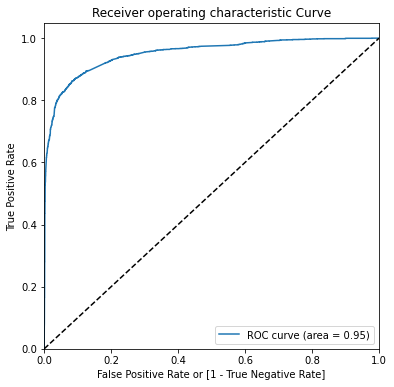

In [121]:
#Plotting a ROC curve:

draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Prob_Converted'])

## Step 8: Finding Optimal Cutoff Point:

In [122]:
#Creating columns with different probability cutoffs:

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Prob_Converted'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Prob_Converted,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.834009,2240,1,1,1,1,1,1,1,1,1,1,0
1,0,0.486585,113,0,1,1,1,1,1,0,0,0,0,0
2,1,0.992282,4132,1,1,1,1,1,1,1,1,1,1,1
3,0,0.046990,5573,0,1,0,0,0,0,0,0,0,0,0
4,0,0.080510,1109,0,1,0,0,0,0,0,0,0,0,0


In [123]:
#Calculating 'Accuracy', 'Sensitivity' and 'Specificity' for various probability cutoffs:

cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm               = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total            = sum(sum(cm))
    accuracy         = ( cm[0,0] + cm[1,1] ) / total
    specificity      = cm[0,0] / ( cm[0,0] + cm[0,1] )
    sensitivity      = cm[1,1] / ( cm[1,0] + cm[1,1] )
    cutoff_df.loc[i] = [ i, accuracy, sensitivity, specificity]
    
cutoff_df

,Probability,Accuracy,Sensitivity,Specificity
0.0,0.0,0.389557,1.000000,0.000000
0.1,0.1,0.762816,0.963851,0.634526
0.2,0.2,0.852373,0.925670,0.805599
0.3,0.3,0.886392,0.881803,0.889321
0.4,0.4,0.894937,0.854184,0.920943
0.5,0.5,0.898734,0.824939,0.945827
0.6,0.6,0.897152,0.793664,0.963193
0.7,0.7,0.882278,0.738424,0.974080
0.8,0.8,0.868196,0.689683,0.982115
0.9,0.9,0.848576,0.622665,0.992742


<Figure size 504x504 with 0 Axes>

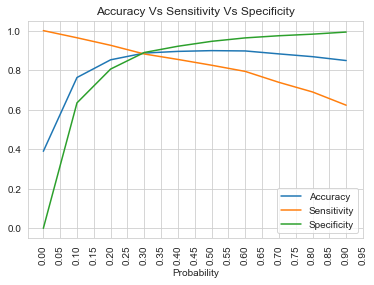

In [124]:
#Plotting a Accuracy Vs Sensitivity Vs Specificity trade off:

sns.set_style('whitegrid')
plt.figure(figsize = (7,7))
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.title('Accuracy Vs Sensitivity Vs Specificity')
plt.xticks(np.arange(0,1,step=.05),rotation = 90)
plt.show()

##### After observing  'Accuracy Vs Sensitivity Vs Specificity' 0.3 Probability seems to be optimal cutoff.

### Let's look at all the metrics when we take cut off 0.3:

In [125]:
#Checking confusion matrix:

con_mat1 = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[0.3] )
print(con_mat1)

[[3431  427]
 [ 291 2171]]


In [126]:
#Checking accuracy score of the model on the training dataset:

acc_score = round(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final[0.3])*100,2)
print('Accuracy score is:' ,acc_score)

Accuracy score is: 88.64


In [127]:
#Mapping the confusion matrix:

TN = con_mat1[0,0]  # True negatives
FP = con_mat1[0,1]  # False positives
FN = con_mat1[1,0]  # False negative
TP = con_mat1[1,1]  # True positive 

#Important metrics:

sensitivity = round((TP / float(TP+FN))*100, 2)
specificity = round((TN / float(TN+FP))*100, 2)
tpr         = round((TP / float(TP+FN))*100, 2)
fpr         = round((FP / float(FP+TN))*100, 2)
precision   = round((TP / float(TP+FP))*100, 2)
recall      = round((TP / float(TP+FN))*100, 2)

print(f'''
Sensitivity is         : {sensitivity}
Specificity is         : {specificity}
True Positive Rate is  : {tpr}
False Positive Rate is : {fpr}
Precision is           : {precision}
Recall is              : {recall}
''')


Sensitivity is         : 88.18
Specificity is         : 88.93
True Positive Rate is  : 88.18
False Positive Rate is : 11.07
Precision is           : 83.56
Recall is              : 88.18



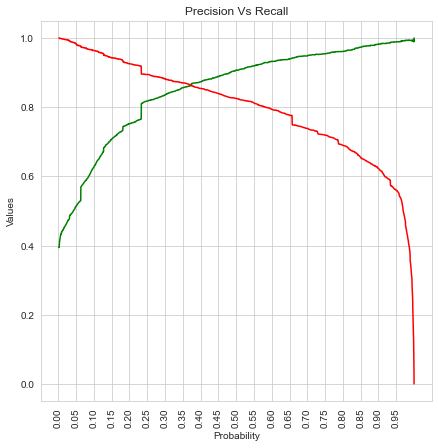

In [128]:
#Lets plot a Precision Vs Recall curve:

p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Prob_Converted'])

sns.set_style('whitegrid')
plt.figure(figsize = (7,7))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision Vs Recall')
plt.xticks(np.arange(0,1,step=.05),rotation = 90)
plt.xlabel("Probability")
plt.ylabel("Values")
plt.show()

In [129]:
#Creating a dataframe for Precision Vs Recall Vs Thresholds:

prdf = pd.DataFrame({"precision":p[:4439],"recall":r[:4439],"threshold":thresholds})
prdf.head()

,precision,recall,threshold
0,0.394425,1.000000,0.001845
1,0.394328,0.999594,0.001864
2,0.394391,0.999594,0.001872
3,0.394454,0.999594,0.001893
4,0.394517,0.999594,0.001898


In [130]:
#Let's look for optimal cutoff where precision and recall are balance:

prdf[prdf["precision"] == prdf["recall"]]

,precision,recall,threshold
2604,0.863119,0.863119,0.372969


#### After observing 'Precision Vs Recall' and dataframe 0.37 seems to be the optimal cutoff.

### Let's look at all the metrics when we take cut off 0.37:


In [131]:
#Adding a new column '0.37' when probability greater than 0.37:

y_train_pred_final[0.37] = y_train_pred_final['Prob_Converted'].map(lambda x: 1 if x > 0.37 else 0)  

# Let's see the head
y_train_pred_final = y_train_pred_final[['Converted','Prob_Converted','Prospect ID','Predicted',0.0,0.1,0.2,0.3,0.37,0.4,0.5,0.6,0.7,0.8,0.9]]
y_train_pred_final.head()

,Converted,Prob_Converted,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.37,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.834009,2240,1,1,1,1,1,1,1,1,1,1,1,0
1,0,0.486585,113,0,1,1,1,1,1,1,0,0,0,0,0
2,1,0.992282,4132,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.046990,5573,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.080510,1109,0,1,0,0,0,0,0,0,0,0,0,0


In [132]:
#Checking confusion matrix:

con_mat2 = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[0.37] )
print(con_mat2)

[[3517  341]
 [ 334 2128]]


In [133]:
#Checking accuracy score of the model on the training dataset:

acc_score = round(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final[0.37])*100,2)
print('Accuracy score is:' ,acc_score)

Accuracy score is: 89.32


In [134]:
#Mapping the confusion matrix:

TN = con_mat2[0,0]  # True negatives
FP = con_mat2[0,1]  # False positives
FN = con_mat2[1,0]  # False negative
TP = con_mat2[1,1]  # True positive 

#Important metrics:

sensitivity = round((TP / float(TP+FN))*100, 2)
specificity = round((TN / float(TN+FP))*100, 2)
tpr         = round((TP / float(TP+FN))*100, 2)
fpr         = round((FP / float(FP+TN))*100, 2)
precision   = round((TP / float(TP+FP))*100, 2)
recall      = round((TP / float(TP+FN))*100, 2)

print(f'''
Sensitivity is         : {sensitivity}
Specificity is         : {specificity}
True Positive Rate is  : {tpr}
False Positive Rate is : {fpr}
Precision is           : {precision}
Recall is              : {recall}
''')


Sensitivity is         : 86.43
Specificity is         : 91.16
True Positive Rate is  : 86.43
False Positive Rate is : 8.84
Precision is           : 86.19
Recall is              : 86.43



### After Observing both 0.3 and 0.37 Cutoffs:
- 0.37 Gives a bit higher accuracy score.
- All the metrics seems good.
- Also false positive rate is lower for 0.37 cutoff which will help in reduction of falsely predictions.

#### Using 0.37 Cutoff to make final predictions:

In [135]:
#Adding Final Predicted column:

y_train_pred_final['final_Predicted'] = y_train_pred_final['Prob_Converted'].map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Prob_Converted,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.37,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.834009,2240,1,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.486585,113,0,1,1,1,1,1,1,0,0,0,0,0,1
2,1,0.992282,4132,1,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.046990,5573,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0.080510,1109,0,1,0,0,0,0,0,0,0,0,0,0,0


In [136]:
#Adding a score for each lead called lead score:

y_train_pred_final['Lead_Score'] = y_train_pred_final['Prob_Converted'].map(lambda x: round(x*100))

y_train_pred_final[['Converted','Prob_Converted','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Prob_Converted,Prospect ID,final_Predicted,Lead_Score
0,0,0.834009,2240,1,83
1,0,0.486585,113,1,49
2,1,0.992282,4132,1,99
3,0,0.046990,5573,0,5
4,0,0.080510,1109,0,8


## Step 9: Making predictions on the test set

In [137]:
#Standardizing all the countinuous variables on test dataset:

num_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
df_test[num_cols] = scaler.transform(df_test[num_cols])

#checking head of the data:

df_test.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Specialization_Not_Specified,Specialization_Travel and Tourism,current_occup_Housewife,current_occup_Other,current_occup_Student,current_occup_Unemployed,current_occup_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Tags_Not_Specified,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
2296,079882c4-cdcb-4dbd-abfd-cd2ef7b118dd,637500,0,1,-0.000842,1.823128,0.455635,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
8697,f4c39bd8-50a5-464d-a518-b152a095fbfa,583473,0,0,1.418589,-0.131328,-0.228673,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
7378,162403e7-3cfb-4e4f-8e33-480afc41ffb6,592851,0,0,-0.355700,-0.215588,-0.091812,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
8631,d1b1a897-16d8-4092-a72f-46c3ed1c0066,583845,0,0,0.708873,0.775378,1.550527,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
4799,565b4e96-015a-4f03-881f-8c32af5677dd,613965,0,1,1.773447,2.145513,3.192866,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1


In [138]:
#Dropping the ID cols from training dataset:

df_test.drop(['Prospect ID','Lead Number'], axis = 1, inplace = True)

In [139]:
#splitting the df_test in X,y sets:

y_test = df_test.pop('Converted')
X_test = df_test

In [140]:
#Selecting all the columns that was remaining in our final model:

X_test = X_test[features]

X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,current_occup_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
2296,0,1.823128,1,0,0,0,0,0,0,0,0,0,1,1
8697,0,-0.131328,1,0,0,0,0,0,0,0,0,1,0,1
7378,0,-0.215588,1,0,0,0,1,0,0,0,0,0,0,0
8631,0,0.775378,0,0,0,0,0,0,0,0,0,0,1,0
4799,0,2.145513,0,0,0,0,0,0,0,0,0,0,1,1


In [141]:
#Adding constant to X_test:

X_test_sm = sm.add_constant(X_test) 

#Making the predictions:

y_test_pred = build_model.res.predict(X_test_sm)

y_test_pred[:10]

2296    0.998050
8697    0.032389
7378    0.157910
8631    0.959750
4799    0.998929
4503    0.656975
7129    0.125468
1717    0.233060
8398    0.647278
5116    0.127177
dtype: float64

In [142]:
#Converting y_pred to a dataframe:
y_pred_1 = pd.DataFrame(y_test_pred)

#Converting y_test to a dataframe:
y_test_df = pd.DataFrame(y_test)

#Putting Prospect ID to index:
y_test_df['Prospect ID'] = y_test_df.index

#Removing index from both the dataframes to append them side by side: 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1: 
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# Renaming the original predicted probability column: 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Prob_Converted'})

# Rearranging the columns:
y_pred_final = y_pred_final[['Prospect ID','Converted','Prob_Converted']]

#Checking the head of the data:
y_pred_final.head()

,Prospect ID,Converted,Prob_Converted
0,2296,1,0.998050
1,8697,0,0.032389
2,7378,0,0.157910
3,8631,0,0.959750
4,4799,1,0.998929


In [143]:
#Adding the final prediction based on the cutoff 0.37:

y_pred_final['final_Predicted'] = y_pred_final['Prob_Converted'].map(lambda x: 1 if x > 0.37 else 0)

#Checking the head of the data:

y_pred_final.head()

,Prospect ID,Converted,Prob_Converted,final_Predicted
0,2296,1,0.998050,1
1,8697,0,0.032389,0
2,7378,0,0.157910,0
3,8631,0,0.959750,1
4,4799,1,0.998929,1


In [144]:
#Adding a score name as lead score for each lead:

y_pred_final['Lead_Score'] = y_pred_final['Prob_Converted'].map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Prob_Converted,final_Predicted,Lead_Score
0,2296,1,0.998050,1,100
1,8697,0,0.032389,0,3
2,7378,0,0.157910,0,16
3,8631,0,0.959750,1,96
4,4799,1,0.998929,1,100


### Let's look at all the metrics:

In [145]:
#Checking confusion matrix:

con_mat3 = confusion_matrix(y_pred_final['Converted'], y_pred_final['final_Predicted'] )
print(con_mat3)

[[1520  174]
 [ 133  882]]


In [146]:
#Checking accuracy score of the model on the test dataset:

acc_score = round(metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['final_Predicted'])*100,2)
print('Accuracy score is:' ,acc_score)

Accuracy score is: 88.67


In [147]:
#Mapping the confusion matrix:

TN = con_mat3[0,0]  # True negatives
FP = con_mat3[0,1]  # False positives
FN = con_mat3[1,0]  # False negative
TP = con_mat3[1,1]  # True positive 

#Important metrics:

sensitivity = round((TP / float(TP+FN))*100, 2)
specificity = round((TN / float(TN+FP))*100, 2)
tpr         = round((TP / float(TP+FN))*100, 2)
fpr         = round((FP / float(FP+TN))*100, 2)
precision   = round((TP / float(TP+FP))*100, 2)
recall      = round((TP / float(TP+FN))*100, 2)

print(f'''
Sensitivity is         : {sensitivity}
Specificity is         : {specificity}
True Positive Rate is  : {tpr}
False Positive Rate is : {fpr}
Precision is           : {precision}
Recall is              : {recall}
''')


Sensitivity is         : 86.9
Specificity is         : 89.73
True Positive Rate is  : 86.9
False Positive Rate is : 10.27
Precision is           : 83.52
Recall is              : 86.9



## Observation:

`        Training Data Set                         Vs                        Test Data Set
 Sensitivity is         : 86.43            |                  Sensitivity is         : 86.90
 Specificity is         : 91.16            |                  Specificity is         : 89.73
 True Positive Rate is  : 86.43            |                  True Positive Rate is  : 86.90
 False Positive Rate is : 08.84            |                  False Positive Rate is : 10.27
 Precision is           : 86.19            |                  Precision is           : 83.52
 Recall is              : 86.43            |                  Recall is              : 86.90
 Accuracy score is      : 89.32            |                  Accuracy score is      : 88.67`
 
 

##### The difference b/w train and test data's performance metrics is under 3%. This means that the final model did not overfit training data and is performing well.

##### High Sensitivity will make sure that all possible leads who are likely to convert are correctly predicted, where as high Specificity will ensure that the leads that are on the brink of the probability of getting converted or not are not selected.

##### Based on the business requirement, we can increase or decrease the probability threshold value which in turn will decrease or increase the Sensitivity and increase or decrease the Specificity of the model as required.

### Feature Importance plot:

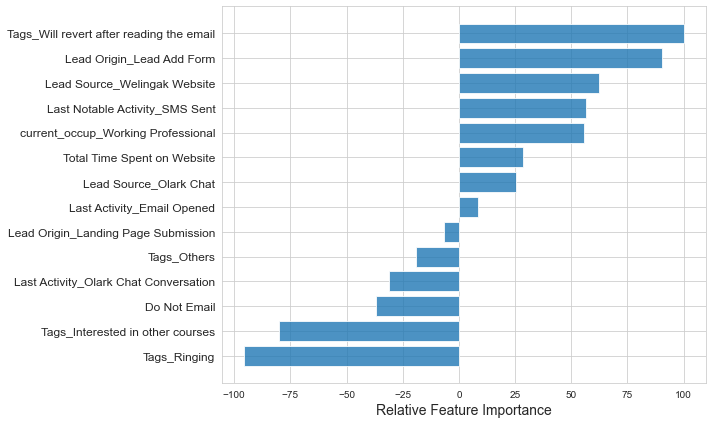

In [148]:
new_params = round(build_model.res.params[1:],2)


# Getting a relative coeffient value for all the features with respect to the feature with the highest coefficient:
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())


# Sorting the feature variables, based on their 'relative coefficient values':
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')


# Ploting the feature variables based on their relative coefficient values
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:blue',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[features].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

### The Top 3 Factors which can help in generating more successful leads:
 - Tags_Will revert after reading the email
 - Lead Origin_Lead Add Form
 - Lead Source_Welingak Website

`_____________________________________________________END_____________________________________________________________________`